In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

지도 
    - 회귀 : 연속적인 데이터를 예측 , 선형회귀, Ridge
    
    - 분류 : 이산적인 데이터를 예측 , Lasso, Elastic

In [2]:
# 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때,
# SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가
# 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.
# 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데 
# SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘이다. 

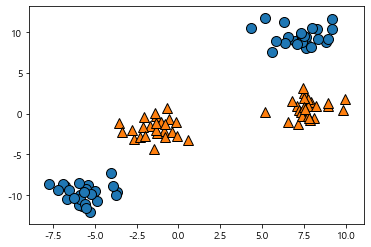

In [3]:
import sklearn.datasets

X, y = sklearn.datasets.make_blobs(centers = 4, random_state = 8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


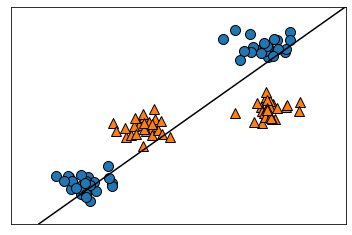

In [4]:
from sklearn.svm import LinearSVC

X, y = sklearn.datasets.make_blobs(centers = 4, random_state = 8)
y = y % 2

linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

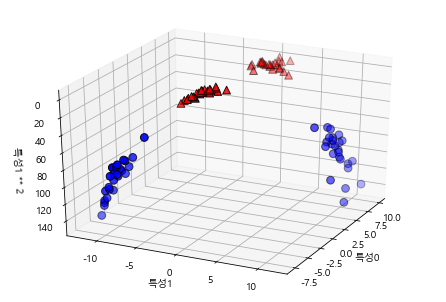

In [5]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

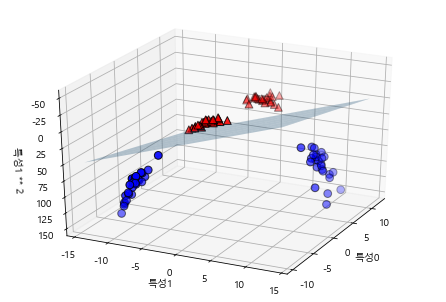

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")



Text(0, 0.5, '특성 1')

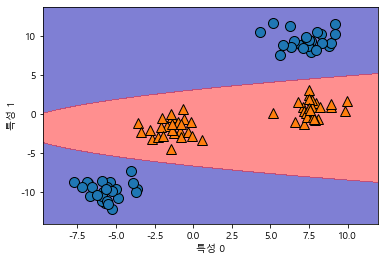

In [7]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 매개변수 : Cost, Gamma

In [8]:
from sklearn.svm import SVC

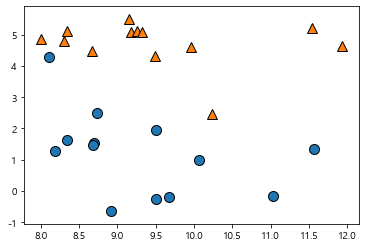

In [9]:
X, y = mglearn.tools.make_handcrafted_dataset()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [10]:
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)

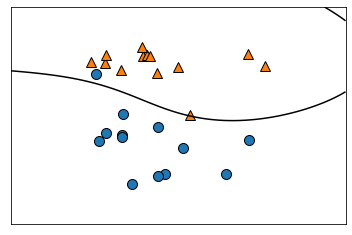

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [12]:
sv = svm.support_vectors_
sv

array([[ 8.1062269 ,  4.28695977],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

Text(0, 0.5, '특성 1')

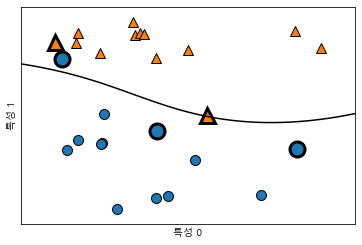

In [13]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

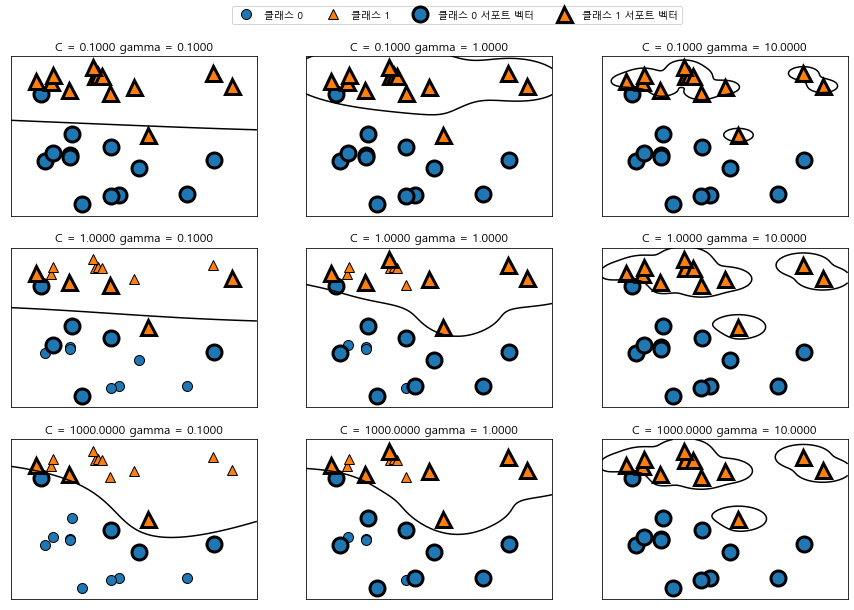

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [16]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
print('훈련 결과 : ', svm.score(X_train, y_train))
print('Test 결과 : ', svm.score(X_test, y_test))

훈련 결과 :  0.903755868544601
Test 결과 :  0.9370629370629371


In [18]:
min_on_training = X_train.min(axis = 0)
min_on_training

range_on_training = (X_train - min_on_training).max(axis = 0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

In [19]:
svm2 = SVC().fit(X_train_scaled, y_train)

In [20]:
print('훈련 결과 : ', svm2.score(X_train_scaled, y_train))
print('Test 결과 : ', svm2.score(X_test_scaled, y_test))

훈련 결과 :  0.9835680751173709
Test 결과 :  0.972027972027972


In [21]:
svm1000 = SVC(C = 1000).fit(X_train_scaled, y_train)

In [22]:
print('훈련 결과 : ', svm1000.score(X_train_scaled, y_train))
print('Test 결과 : ', svm1000.score(X_test_scaled, y_test))

훈련 결과 :  1.0
Test 결과 :  0.958041958041958


### 사례1 : 농구선수의 포지션 예측

In [24]:
df = pd.read_csv('data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [25]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

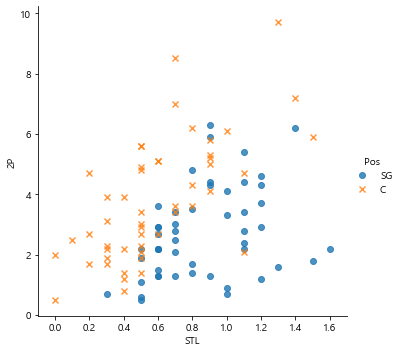

In [26]:
sns.lmplot('STL', '2P', data = df, fit_reg = False, hue = 'Pos', markers = ['o', 'x'])

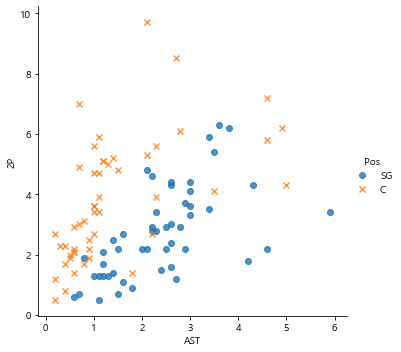

In [27]:
sns.lmplot('AST', '2P', data = df, fit_reg = False, hue = 'Pos', markers = ['o', 'x'])

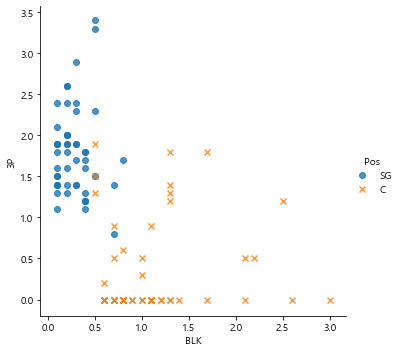

In [28]:
sns.lmplot('BLK', '3P', data = df, fit_reg = False, hue = 'Pos', markers = ['o', 'x'])

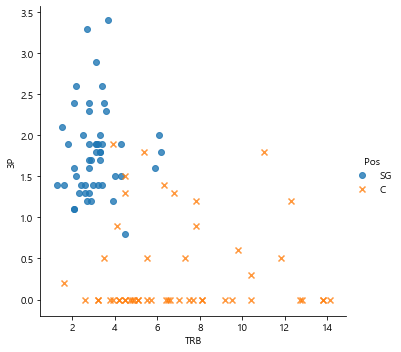

In [29]:
sns.lmplot('TRB', '3P', data = df, fit_reg = False, hue = 'Pos', markers = ['o', 'x'])

In [30]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

In [31]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [32]:
train, test = train_test_split(df, test_size = 0.2)

In [33]:
train.shape
test.shape

(20, 5)

In [34]:
X_train = train[['3P', 'BLK']]
y_train = train['Pos']

In [39]:
from sklearn.model_selection import GridSearchCV

# svm = SVC(C = 0.1, gamma = 1000).fit(X_train, y_train)

svm_param = [{'kernel' : ['rbf'], 'gamma' : [0.00001, 0.0001, 0.1, 1], 'C' : [0.01, 0.1, 1, 10, 100, 1000]}]
svm = GridSearchCV(SVC(), svm_param).fit(X_train, y_train)

In [40]:
X_test = test[['3P', 'BLK']]
y_test = test['Pos']

In [41]:
pred = svm.predict(X_test)

In [42]:
print('정확도 : ', sklearn.metrics.accuracy_score(y_test, pred))

정확도 :  1.0


In [43]:
print(svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


# 사례2 : 손글씨 이미지 (실전개발입문 P.183)

In [44]:
import urllib.request as req
import gzip, os, os.path
savepath = "./data/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]
# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [45]:
import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n" #28 x 28 이미지 크기는 255
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)
to_csv("t10k", 500)

In [46]:
"""
포터블 비트맵(PGM)
    -PBM : 하나의 화소를 1bit로 표현
    -PGM : 하나의 화소를 1byte로 표현 (흑백)
    -PPM : 하나의 화소를 3byte로 표현 훨씬더 많은 칼라이미지rgb 1 바이트씩

heager
    -magic number
    P1, P4 : PBM
    P2, P5 : PGM
    P3, P6 : PPM
    - 


"""

'\n포터블 비트맵(PGM)\n    -PBM : 하나의 화소를 1bit로 표현\n    -PGM : 하나의 화소를 1byte로 표현 (흑백)\n    -PPM : 하나의 화소를 3byte로 표현 훨씬더 많은 칼라이미지rgb 1 바이트씩\n\nheager\n    -magic number\n    P1, P4 : PBM\n    P2, P5 : PGM\n    P3, P6 : PPM\n    - \n\n\n'

In [47]:
def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [49]:
print(data["images"][2])
print(data["labels"][2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26171875, 0.90625, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2421875, 0.31640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46875, 0.703125, 0.1523437

In [61]:
model = SVC().fit(data["images"], data["labels"])


In [62]:
pred = model.predict(test['images'])

acc = sklearn.metrics.accuracy_score(test['labels'], pred)
print(sklearn.metrics.classification_report(test["labels"], pred))
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.98      0.96      0.97        55
           3       0.93      0.91      0.92        46
           4       0.93      0.98      0.96        55
           5       0.92      0.94      0.93        50
           6       0.98      0.93      0.95        43
           7       0.94      0.96      0.95        49
           8       0.93      0.97      0.95        40
           9       1.00      0.91      0.95        54

    accuracy                           0.96       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.96      0.96       501

0.9560878243512974


In [63]:
pred1 = model.predict([test["images"][200]])
pred1

array([3])

In [64]:
test["labels"][200]

3

In [65]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [68]:
from IPython.display import HTML
HTML(input_form +javascript)

In [70]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [71]:
pred2 = model.predict([image])

In [72]:
pred2

array([3])

# 학습 모델 저장하기

In [74]:
# pickle 객체 화일처리 객체, 2진파일처리
# picle(serializable)

import pickle 

f = open("data/pickletest1.pickle", "wb") #2진수로 인코딩된 
phones = {"tom":"111-1111", "길동":"222-2222"}
product = {"마우스","키보드"}
t = (phones, product)

pickle.dump(t,f)

# f.write(t)
f.close()

In [75]:
f = open("data/pickletest1.pickle","rb") # 2진수로 읽어와야되니깐
a = pickle.load(f)
print(a)

f.close()

({'tom': '111-1111', '길동': '222-2222'}, {'마우스', '키보드'})


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [77]:
iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target

In [78]:
clf = LogisticRegression(random_state=0)
clf.fit(X,y)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
saved_model = pickle.dumps(clf)
saved_model

b'\x80\x03csklearn.linear_model._logistic\nLogisticRegression\nq\x00)\x81q\x01}q\x02(X\x07\x00\x00\x00penaltyq\x03X\x02\x00\x00\x00l2q\x04X\x04\x00\x00\x00dualq\x05\x89X\x03\x00\x00\x00tolq\x06G?\x1a6\xe2\xeb\x1cC-X\x01\x00\x00\x00Cq\x07G?\xf0\x00\x00\x00\x00\x00\x00X\r\x00\x00\x00fit_interceptq\x08\x88X\x11\x00\x00\x00intercept_scalingq\tK\x01X\x0c\x00\x00\x00class_weightq\nNX\x0c\x00\x00\x00random_stateq\x0bK\x00X\x06\x00\x00\x00solverq\x0cX\x05\x00\x00\x00lbfgsq\rX\x08\x00\x00\x00max_iterq\x0eKdX\x0b\x00\x00\x00multi_classq\x0fX\x04\x00\x00\x00autoq\x10X\x07\x00\x00\x00verboseq\x11K\x00X\n\x00\x00\x00warm_startq\x12\x89X\x06\x00\x00\x00n_jobsq\x13NX\x08\x00\x00\x00l1_ratioq\x14NX\x08\x00\x00\x00classes_q\x15cnumpy.core.multiarray\n_reconstruct\nq\x16cnumpy\nndarray\nq\x17K\x00\x85q\x18C\x01bq\x19\x87q\x1aRq\x1b(K\x01K\x03\x85q\x1ccnumpy\ndtype\nq\x1dX\x02\x00\x00\x00i4q\x1eK\x00K\x01\x87q\x1fRq (K\x03X\x01\x00\x00\x00<q!NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq"b\x89C\x0c\x00\x00

In [80]:
clf2=pickle.loads(saved_model) #저장한 모델 불러와라

In [81]:
clf2.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
# joblib  모듈사용
joblib.dump(clf, "data/filename.pkl")

['data/filename.pkl']

In [88]:
clf3 = joblib.load("data/filename.pkl")

In [89]:
clf3.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Naive Bayes